# training function (ROSE-1 SVC coarse) testing notebook:

This notebook is created for the intension of testing the training function for ROSE-1 SVC coarse model.

In [1]:
# add directory
import sys
sys.path.append(r"C:\Users\klee232\Desktop\Thesis\personal-GitHub\adp-3-human-retina-python\Phase_1_Segmentation")

In [2]:
# import all functions needed tested
# passed: successfully load all functions
from data_function_2D import * 
from models_2D import *

## Load dataset:

### Loading:

In [3]:
# run load_rose_1_dataset() function first 
output = load_rose_1_dataset()
# SVC
train_ROSE_SVC_org = output["train_ROSE_SVC_org"]
train_ROSE_SVC_orgGt = output["train_ROSE_SVC_orgGt"]
train_ROSE_SVC_thickGt = output["train_ROSE_SVC_thickGt"]
train_ROSE_SVC_thinGt = output["train_ROSE_SVC_thinGt"]
test_ROSE_SVC_org = output["test_ROSE_SVC_org"]
test_ROSE_SVC_orgGt = output["test_ROSE_SVC_orgGt"]
test_ROSE_SVC_thickGt = output["test_ROSE_SVC_thickGt"]
test_ROSE_SVC_thinGt = output["test_ROSE_SVC_thinGt"]

## Launch training function:

In [ ]:
trained_net = train_rose_1_SVC_coarse(output, num_epoch=200, learning_rate=3e-4, use_aug=True, early_break_counter=40)

Current Epoch: 10 | Loss value 0.7538085082202282
Current Epoch: 10 | Validation Loss value 0.6770271573747907
Epoch [10/200] finished in 407.84 seconds (6.80 minutes)
Fold [1/4.0] | Epoch [10/200] | Train Loss: 0.7538 | Val Loss: 0.6770
Current Epoch: 20 | Loss value 0.7203575042844976
Current Epoch: 20 | Validation Loss value 0.6651632956096104
Epoch [20/200] finished in 383.20 seconds (6.39 minutes)
Fold [1/4.0] | Epoch [20/200] | Train Loss: 0.7204 | Val Loss: 0.6652
Current Epoch: 30 | Loss value 0.7066005121157007
Current Epoch: 30 | Validation Loss value 0.66006452696664
Epoch [30/200] finished in 381.02 seconds (6.35 minutes)
Fold [1/4.0] | Epoch [30/200] | Train Loss: 0.7066 | Val Loss: 0.6601
Current Epoch: 40 | Loss value 0.6835166655697869
Current Epoch: 40 | Validation Loss value 0.6619179759706769
Epoch [40/200] finished in 383.34 seconds (6.39 minutes)
Fold [1/4.0] | Epoch [40/200] | Train Loss: 0.6835 | Val Loss: 0.6619
Current Epoch: 50 | Loss value 0.6713383463979925


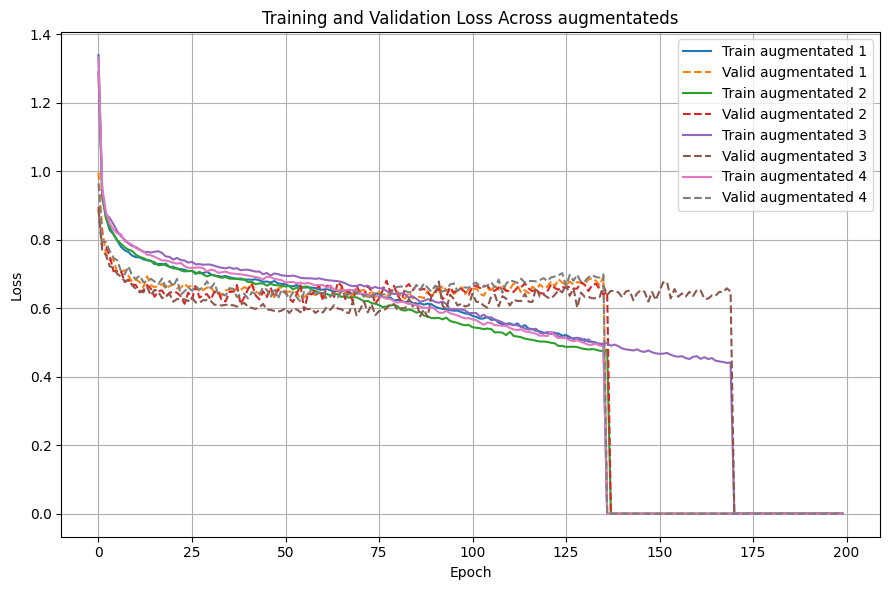

In [4]:
# ideal early_break_counter = 40
trained_net = train_rose_1_SVC_coarse(output, num_epoch=200, learning_rate=3e-4, use_aug=True, early_break_counter=80)

## Launch testing function:

In [4]:
# load trained network if needed
# create environment
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load trained network
path = "trained_nets"
prefix = "svc_coarse"
model_name = "SVC_coarse_prototype_net_1"
optimizer_name = "AdamW"
tag = "best"
full_model_name = f"trained_nets/{prefix}_{model_name}_{optimizer_name}_{tag}.pt"
trained_net = SVC_coarse_prototype_net_1()
trained_net = trained_net.to(device)
checkpoint = torch.load(full_model_name, map_location=device)
trained_net.load_state_dict(checkpoint["model_state"])

C:\Users\klee232\AppData\Local\Temp\ipykernel_12984\2460301631.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(full_model_name, map_location=dev

<All keys matched successfully>

In [5]:
test_table = test_rose_1_SVC_coarse (trained_net, output, threshold=0.5, use_amp=True)

[OK] Saved 9 rows to coarse_results_table\SVC_coarse_prototype_net_1results.csv and figures
